# Importing the dependencies

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap

# Data collection and preprocesssing

In [11]:
d = pd.read_csv('diabetes.csv')

In [13]:
d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
d.shape

(768, 9)

In [17]:
d.duplicated().sum()

0

In [21]:
d.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [25]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
d.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [29]:
d['Outcome'].value_counts(normalize = True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [31]:
d.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


# Data Visualisation

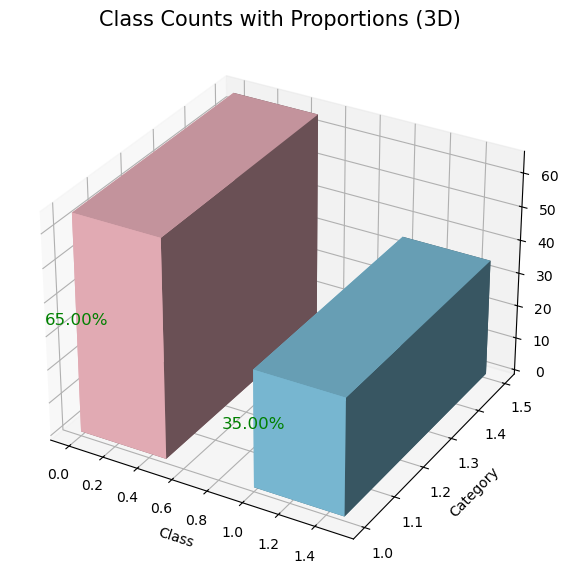

In [152]:
data ={'Class':[0,1],'Count':[65,35]}
df = pd.DataFrame(data)
df['Proportion'] = (df['Count']/df['Count'].sum())*100

fig = plt.figure(figsize=(10,7))
ax = plt.add_subplot(111,projection = '3d')

x= df['Class']
y = [1,1]
z = [0,0]

dx = np.ones_like(df['Class'])*0.5
dy = np.ones_like(df['Class'])*0.5
dz = df['Count']

colors = ['pink','blue']
ax.bar3d(x,y,z,dx,dy,dz,color = colors)

for i in range(len(df)):
    ax.text(df['Class'][i], 1, df['Count'][i] / 2, f'{df["proportion"][i]:.2f}%', color='green', fontsize=12, ha='center')
ax.set_xlabel('Class')
ax.set_ylabel('Category')
ax.set_zlabel('Count')
ax.set_title('Class Counts with Proportions (3D)', fontsize=15)

plt.show()

In [176]:
d.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

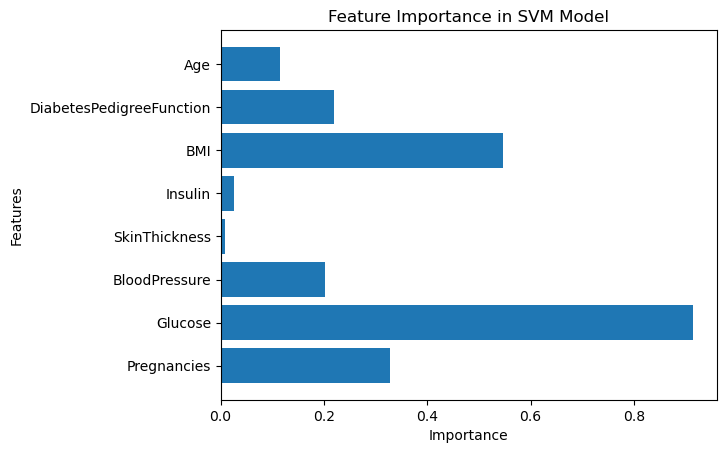

In [186]:
importance = np.abs(classifier.coef_[0])
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
plt.barh(feature_names,importance)

plt.title('Feature Importance in SVM Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [54]:
dcorr = d.select_dtypes(include = 'number').corr

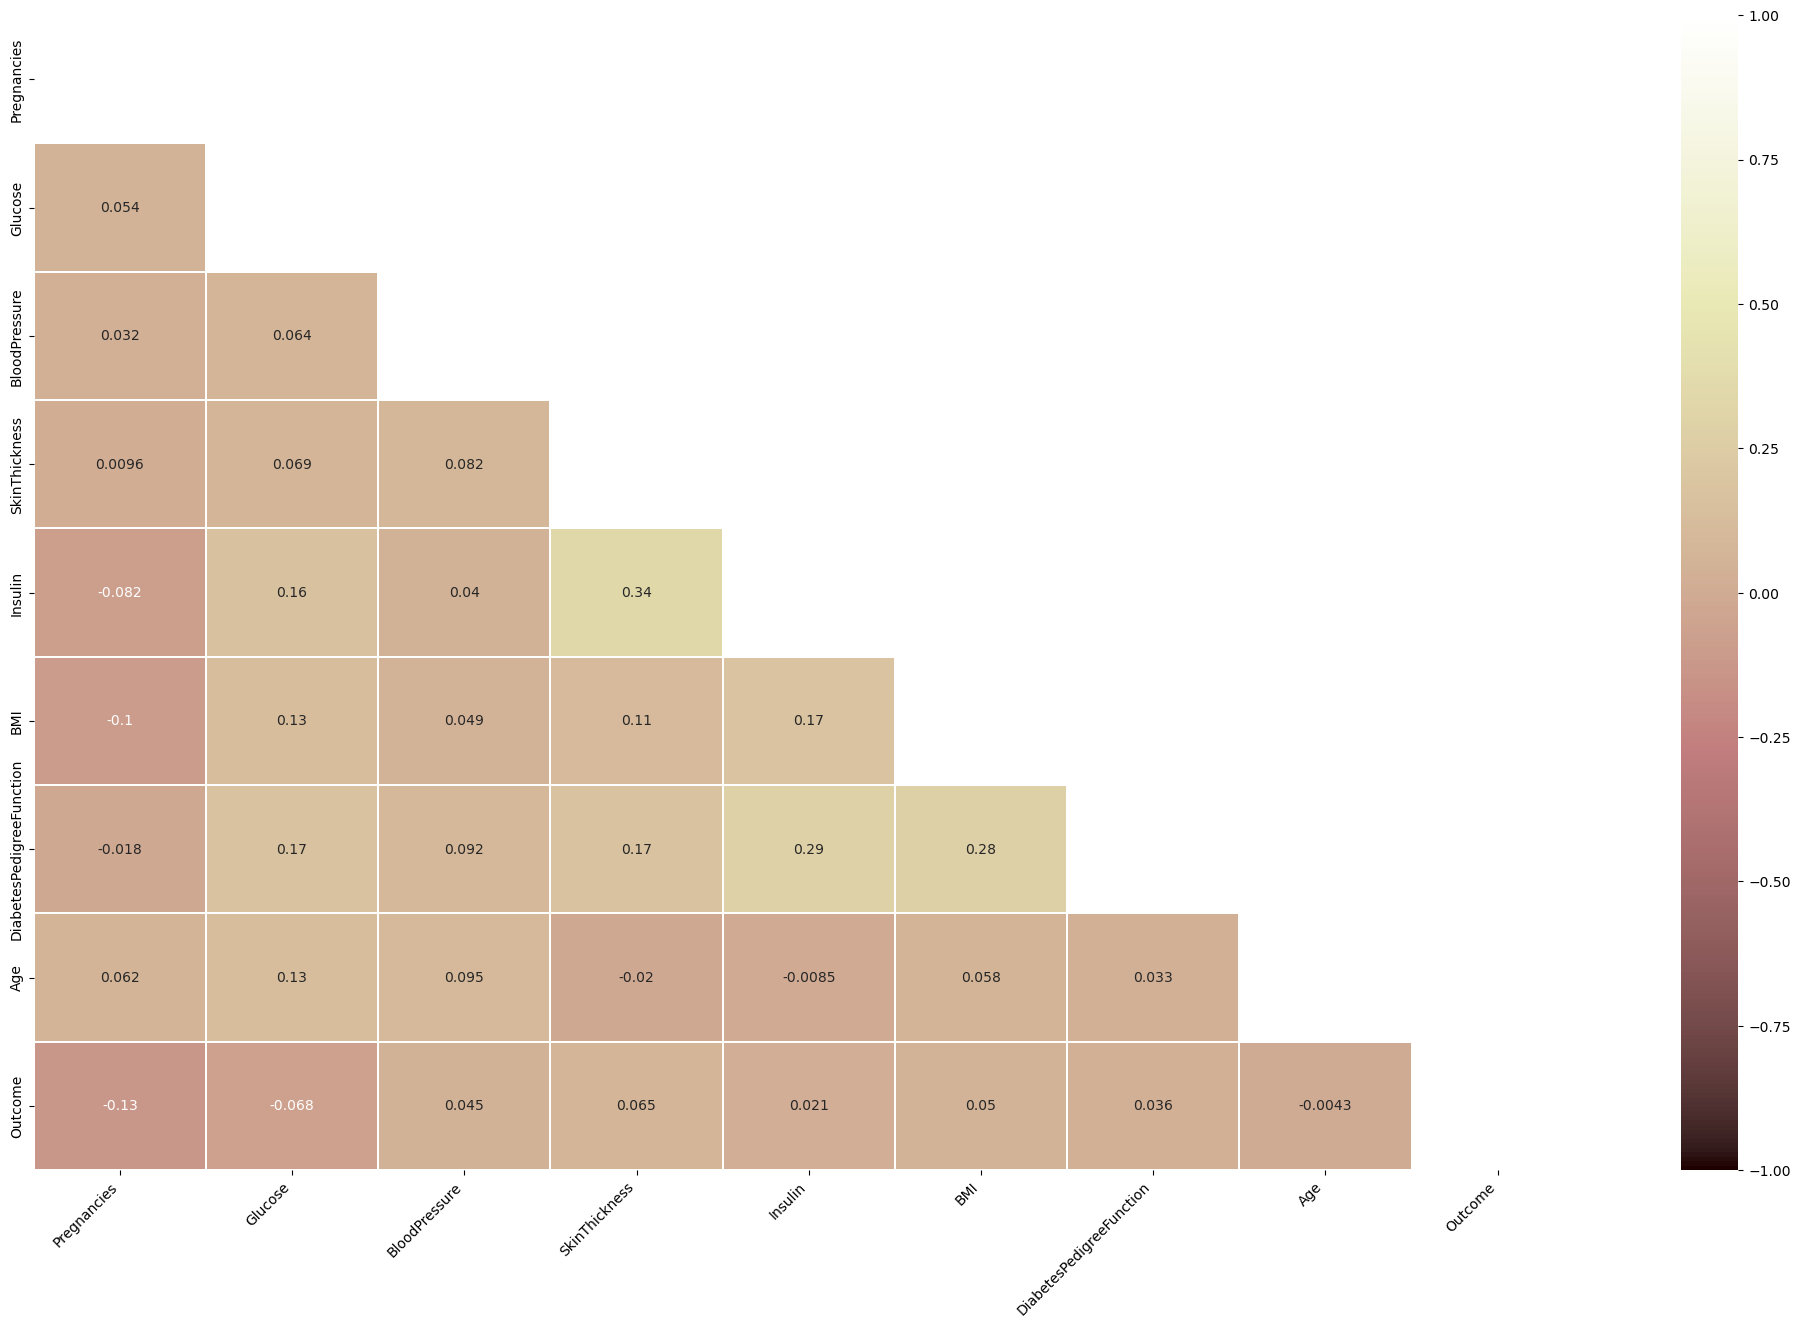

In [62]:
plt.figure(figsize = (25,15))
corr = d.apply(lambda x: pd.factorize(x)[0]).corr()
corr = corr.fillna(0)
mask = np.triu(np.ones_like(corr, dtype = bool))
plt.xticks(rotation = 45, ha = 'right')
plt.yticks(rotation =0)
ax = sns.heatmap(corr, mask = mask, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, linewidths = 0.2, cmap = 'pink', vmin = -1, vmax = 1)

# Separating the features and labels

In [69]:
x = d.drop(columns = 'Outcome', axis = 1)
y = d['Outcome']

In [71]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [73]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [76]:
s = StandardScaler()
s.fit(x)
scaler = s.transform(x)

In [78]:
scaler

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [80]:
x = scaler

# Train test split

In [83]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2, stratify = y, random_state = 31)

In [85]:
print(x.shape,x_train.shape,x_test.shape)

(768, 8) (614, 8) (154, 8)


# Training the model

In [88]:
classifier = svm.SVC(kernel = 'linear')
classifier.fit(x_train,y_train)

SVC(kernel='linear')

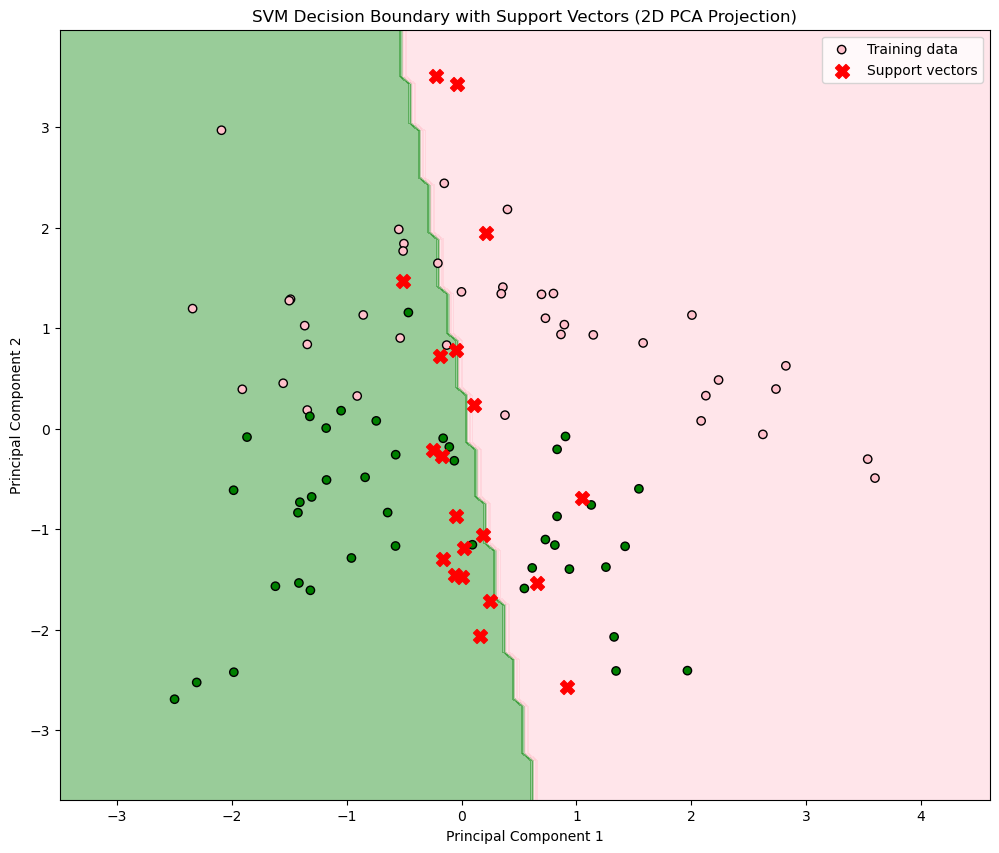

In [224]:
pca = PCA(n_components = 2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

plt.figure(figsize = (12,10))

xx,yy = np.meshgrid(np.linspace(x_train_pca[:,0].min()-1, x_train_pca[:,0].max()+1, 100),
                   np.linspace(x_train_pca[:,1].min()-1, x_train_pca[:,1].max()+1, 100))

z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx,yy,z, alpha = 0.4, cmap = ListedColormap(['green', 'pink']))

plt.scatter(x_train_pca[:,0],x_train_pca[:,1], c = y_train, cmap = ListedColormap(['green', 'pink']), marker = 'o',edgecolors ='k', label = 'Training data')

plt.scatter(classifier.support_vectors_[:,0], classifier.support_vectors_[:,1],color = 'red', s = 100, label = 'Support vectors', marker = 'X')
plt.title("SVM Decision Boundary with Support Vectors (2D PCA Projection)")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.show()

# Model evaluation

In [97]:
y_train_pred = classifier.predict(x_train)
train_accuracy = accuracy_score(y_train_pred,y_train)
train_accuracy

0.7768729641693811

In [99]:
y_test_pred = classifier.predict(x_test)
test_accuracy = accuracy_score(y_test_pred,y_test)
test_accuracy

0.7727272727272727

In [119]:
def con(y_train_pred,y_train,dom):
    print(f'{dom} confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf, annot = True, cmap = 'RdBu_r')
    plt.tight_layout()
    plt.show()

Train Data confusion matrix


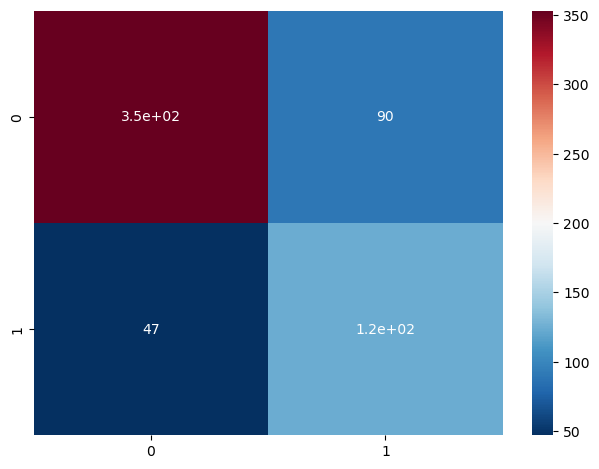

In [121]:
con(y_train_pred,y_train, dom = 'Train Data')

Test Data confusion matrix


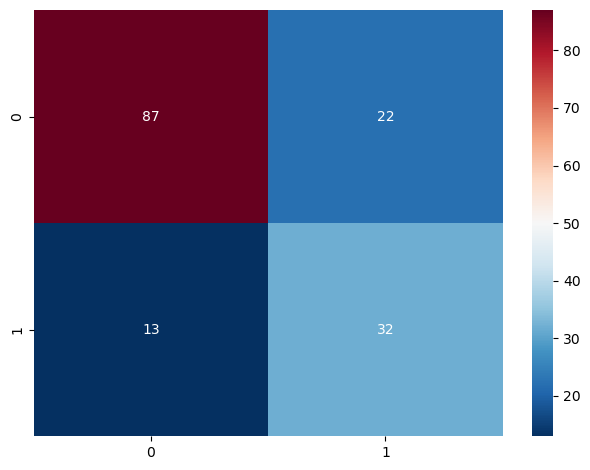

In [123]:
con(y_test_pred,y_test, dom = 'Test Data')

<Axes: xlabel='Outcome', ylabel='Density'>

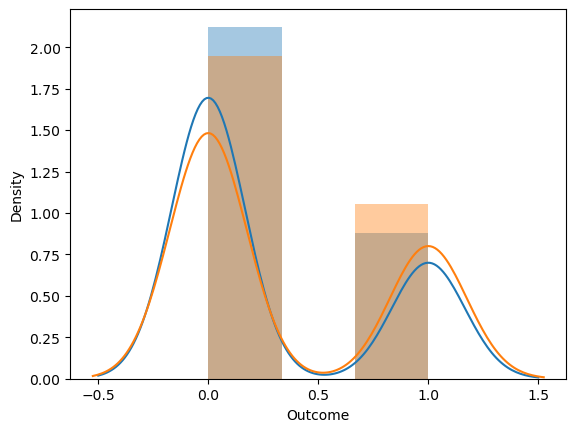

In [125]:
sns.distplot(y_test_pred, label = 'Predicted')
sns.distplot(y_test, label = 'Actual')


In [128]:
d.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


# Making predictive system

In [136]:
input_data= (1,106,76,0,0,37.5,0.197,26)
input_data_np = np.asarray(input_data)
input_data_np_reshaped = input_data_np.reshape(1,-1)
std = s.transform(input_data_np_reshaped)
prediction = classifier.predict(std)
prediction
if (prediction[0] == '0'):
    print('The person is Non Diabetic')
else:
    print('The person is Diabetic')

The person is Diabetic
